In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

df_train = pd.read_csv('../../Datasets/spaceship-titanic/train.csv')

In [2]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [23]:
col_fill_none = ['Cabin', 'Name']
col_fill_mean = ['Age']
col_fill_mode = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for col in col_fill_none:
    df_train[col] = df_train[col].fillna('None')

for col in col_fill_mean:
    df_train[col] = df_train[col].fillna(df_train[col].mean())

for col in col_fill_mode:
    df_train[col] = df_train[col].fillna(df_train[col].mode()[0])

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(3), float64(6), object(5)
memory usage: 772.6+ KB


In [24]:
num_attributes = df_train.select_dtypes(exclude='object')

high_quant = df_train.quantile(.999)

for i in num_attributes.columns:
    df_train = df_train.drop(df_train[i][df_train[i]>high_quant[i]].index)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8640 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8640 non-null   object 
 1   HomePlanet    8640 non-null   object 
 2   CryoSleep     8640 non-null   bool   
 3   Cabin         8640 non-null   object 
 4   Destination   8640 non-null   object 
 5   Age           8640 non-null   float64
 6   VIP           8640 non-null   bool   
 7   RoomService   8640 non-null   float64
 8   FoodCourt     8640 non-null   float64
 9   ShoppingMall  8640 non-null   float64
 10  Spa           8640 non-null   float64
 11  VRDeck        8640 non-null   float64
 12  Name          8640 non-null   object 
 13  Transported   8640 non-null   bool   
dtypes: bool(3), float64(6), object(5)
memory usage: 1.1+ MB


<AxesSubplot:>

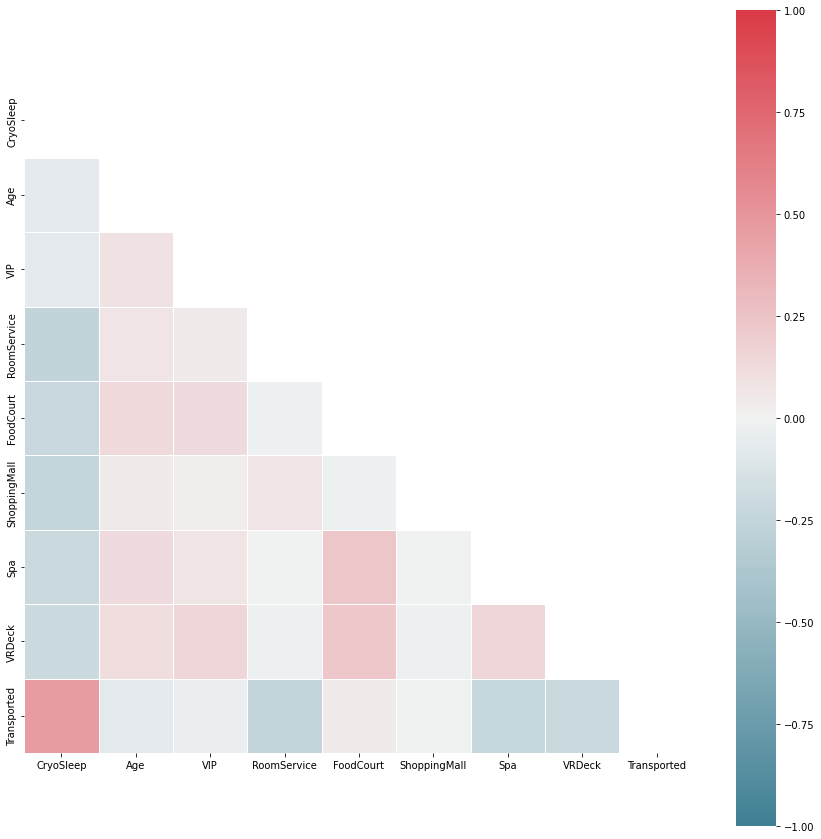

In [26]:
# Correlation of numerical attributes
corr = df_train.corr()

# Using mask to get triangular correlation matrix
f, ax = plt.subplots(figsize=(15, 15))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, vmin = -1.0, vmax = 1.0, linewidths=.5)

In [27]:
corr['Transported'].sort_values(ascending=False)

Transported     1.000000
CryoSleep       0.461109
FoodCourt       0.041001
ShoppingMall   -0.000639
VIP            -0.038034
Age            -0.071894
VRDeck         -0.216334
Spa            -0.229371
RoomService    -0.254762
Name: Transported, dtype: float64

In [ ]:
df_train.to_csv('clean_train.csv', index = False)